# Question 1

You  should  run  the  k-means  algorithm  on  the  stock  data,  while  using init=’random’ and the default values for the other parameters.  Compute the sum of squared errors (SSE) for the clustering you obtained and include it in your report.

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('clustering_data.csv', index_col=0)

Default number of clusters: 8 <br>
Method for initialization 'random’: choose 8 observations (rows) at random from data for the initial centroids

In [3]:
kmeans = KMeans(init='random').fit(data)

inertia_: Sum of squared distances (SSE) of samples to their closest cluster center, weighted by the sample weights if provided

In [5]:
sse = kmeans.inertia_
print("The SSE for this clustering:", sse)

The SSE for this clustering: 1737.8097361948003


# Question 2

You should then try to decrease the SSE as much as possible (while keeping k=8) by changing some of the parameters accordingly.  To this end, select two parameters that you think should impact the results the most.<br>
For each parameter explain:<br>
a) how you expect that changing that parameter would affect the results (increasing its value means better or worse results?<br>
b) whether increasing or decreasing the value of the parameter should always improve the results or not necessarily.

max_iter: int, default=300<br>
Maximum number of iterations of the k-means algorithm for a single run.

In [20]:
# Test the effect by Maximum number of iterations
max_iterations = range(1, 1000, 10)
sse_array = []

for i in max_iterations:
    kmeans = KMeans(init='random', max_iter=i).fit(data)
    sse = kmeans.inertia_
    sse_array.append(sse)

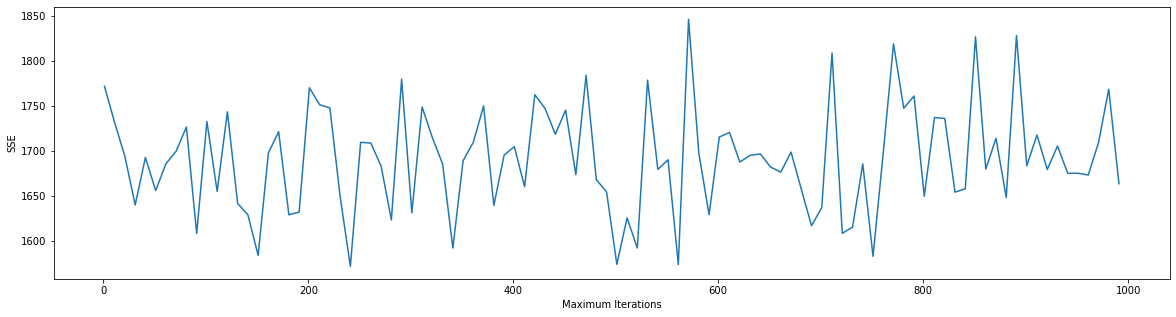

In [23]:
plt.figure(figsize=(20, 5))
plt.plot(max_iterations, sse_array)
plt.xlabel('Maximum Iterations')
plt.ylabel('SSE')
plt.show()

Number of Iterations (max_iter):<br><br>
a) Expected impact: The max_iter parameter controls the maximum number of iterations the K-means algorithm will perform to converge. Increasing the value of max_iter allows the algorithm to run for more iterations, potentially leading to better convergence and lower SSE.<br><br>
b) Impact on results: Increasing the value of max_iter may improve the results, but it does not necessarily guarantee better results. There is a point of diminishing returns where further increasing max_iter does not significantly improve the SSE.

Method for initialization:

‘k-means++’ : selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is “greedy k-means++”. It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.

‘random’: choose n_clusters observations (rows) at random from data for the initial centroids

In [28]:
# Test the effect by K-means++ and Random
max_iterations = range(1, 1000, 10)
sse_array_random = []
sse_array_kmeans_plusplus = []

for i in num_of_runs:
    kmeans_random = KMeans(init='random', max_iter=i).fit(data)
    sse_random = kmeans_random.inertia_
    sse_array_random.append(sse_random)
    kmeans_plusplus = KMeans(init='k-means++', max_iter=i).fit(data)
    sse_plusplus = kmeans_plusplus.inertia_
    sse_array_kmeans_plusplus.append(sse_plusplus)

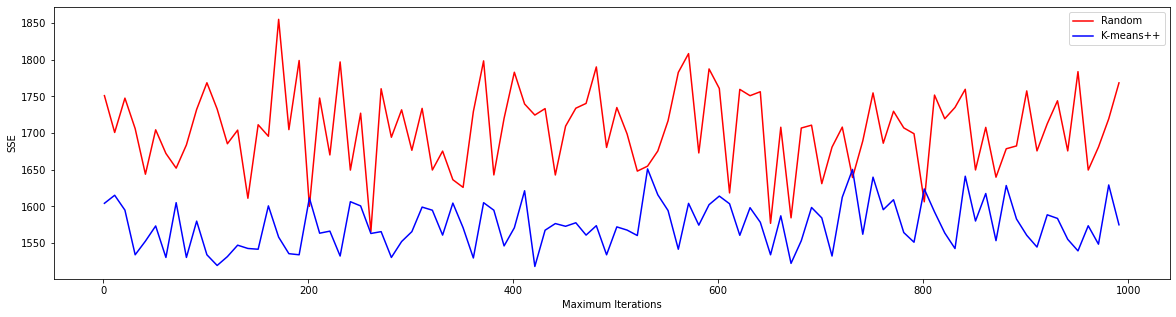

In [31]:
plt.figure(figsize=(20, 5))
plt.plot(max_iterations, sse_array_random, color='red', label='Random')
plt.plot(max_iterations, sse_array_kmeans_plusplus, color='blue', label='K-means++')

plt.xlabel('Maximum Iterations')
plt.ylabel('SSE')
plt.legend()
plt.show()

K-means++:<br><br>
a) Expected impact: By using K-means++ initialization, the initial centroids are placed in a way that reduces the chance of getting stuck in suboptimal local optima. This improves the chances of finding a better clustering solution with lower SSE. Therefore, changing from Random to K-means++ initialization is expected to decrease the SSE and yield better results.<br><br>
b) Impact on results: K-means++ initialization aims to select centroids that are well-distributed across the dataset. It generally tends to improve the results compared to random initialization. However, there may be datasets where the inherent structure or distribution of the data makes it challenging for K-means++ to find an optimal initialization. In such cases, random initialization might accidentally stumble upon a better set of initial centroids.

# Question 3

Then  look  at  the  clustering  you  obtained  and  try  to  label  each  clusterwith a topic.  For example:  cluster of technology stocks,  oil stocks,  etc. Don’t expect your clustering to be perfect.  In particular, you might have different kinds of stocks in a given cluster,  while you might not be able to label all clusters.  We expect that you should be able to label at least three clusters with a topic. It is fine to describe a cluster as a technology cluster if most of the stocks deal with technology, for example. Explain your answers.

In [32]:
kmeans_improved = KMeans(
    init='k-means++', 
    n_init=100,
    max_iter=10000
).fit(data)

In [33]:
clusters = kmeans_improved.labels_
stockNames = data.index

In [34]:
table_data = {'Clusters': clusters, 'Stock Names': stockNames}
table_df = pd.DataFrame(table_data)

In [35]:
# Group the data by Clusters
grouped_data = table_df.groupby('Clusters')['Stock Names'].apply(list)

# Create the final table
display_table = pd.DataFrame({'Stock Names': grouped_data.values})

# Set the maximum column width to 0 will prevent any wrapping of the column content
pd.set_option('display.max_colwidth', 0)

In [15]:
print(display_table)

                                                                                                                               Stock Names
0  [Cisco Systems]                                                                                                                        
1  [Chevron, ExxonMobil, JPMorgan Chase]                                                                                                  
2  [Kraft, Procter & Gamble, AT&T, McDonalds, Coca-Cola]                                                                                  
3  [Hewlett-Packard]                                                                                                                      
4  [Intel, Merck, Johnson & Johnson]                                                                                                      
5  [American Express, Boeing, Microsoft, IBM, The Home Depot, Walt Disney, Wal-Mart, General Electric, United Technologies, Travelers, 3M]
6  [Bank of America]       

Cluster 1: Oil Stocks <br>
Both Chevron and ExxonMobil are in Integrated Oil industry.<br><br>
Cluster 2: Consumers <br>
Kraft, Procter & Gamble, AT&T, McDonalds and Coca-Cola are Consumer Products / Services.<br><br>
Cluster 4: Technology <br>
Microsoft is technology company. March and Johnson & Johnson are related to Health Technology.